In [1]:
import pandas as pd 


df=pd.read_csv('../data/cleaned.csv')

In [2]:
from sklearn.model_selection import train_test_split

X=df.drop('Time_taken(min)',axis=1)
y=df['Time_taken(min)']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=44)

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ran_param = {
    'n_estimators': [100, 200],       
    'max_depth': [10, 20],           
    'min_samples_split': [2, 5]      
}
ran_grid=GridSearchCV(RandomForestRegressor(random_state=44),param_grid=ran_param,cv=3)
ran_grid.fit(X_train,y_train)
print(ran_grid.best_params_)

rid_param={
    'alpha':[0.1,1.0,10],
    'max_iter':[100,1000]
}
rid_grid=GridSearchCV(Ridge(),param_grid=rid_param,cv=3)
rid_grid.fit(X_train,y_train)
print(rid_grid.best_params_)

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
{'alpha': 10, 'max_iter': 100}


In [4]:
rid_pred= rid_grid.predict(X_test)
ran_pred= ran_grid.predict(X_test)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, pred, y_test):
    residual=y_test-pred
    print(f"{name} Evaluation:")
    print("MAE :", mean_absolute_error(y_test, pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("R²  :", r2_score(y_test, pred))
    
    # Optional: Plot Actual vs Predicted
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6, 4))
    plt.scatter(pred,residual, alpha=0.4, edgecolor='k')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('residual')
    plt.title(f'{name} - residual vs Predicted')
    plt.grid()
    plt.show()


Random Forest Evaluation:
MAE : 5.6545162942849165
RMSE: 7.164828878104097
R²  : 0.41837521328836536


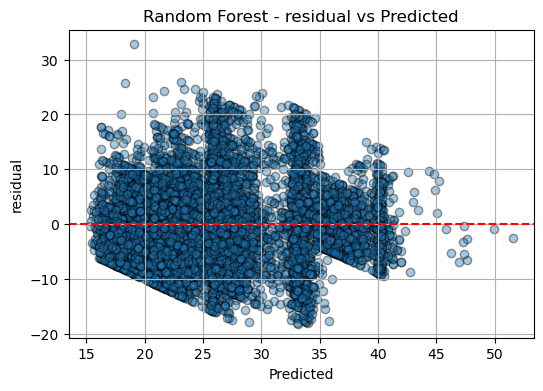

Ridge Regression Evaluation:
MAE : 6.311270352435042
RMSE: 7.964794320449681
R²  : 0.28124580563061674


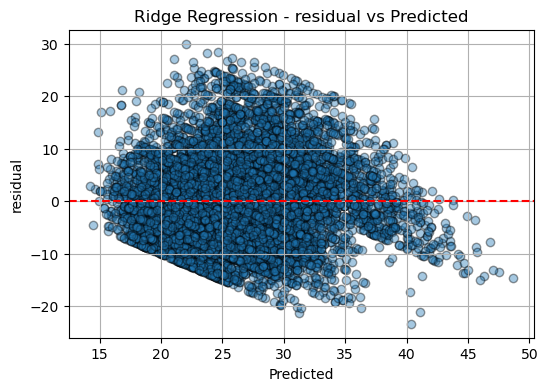

In [6]:
evaluate_model("Random Forest", ran_pred,  y_test)
evaluate_model("Ridge Regression", rid_pred, y_test)


In [7]:
best_rf = ran_grid.best_estimator_
importances = best_rf.feature_importances_


feature_names = X_train.columns 


feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


print(feat_imp_df)



                   Feature  Importance
2  Delivery_person_Ratings    0.430815
4                 distance    0.281094
1      Delivery_person_Age    0.177440
3          Type_of_vehicle    0.058309
0               Unnamed: 0    0.052341


In [8]:
import joblib

joblib.dump(ran_grid,'../data/randomeforest.joblib')


['../data/randomeforest.joblib']